In [1]:
import glob
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

## Load Feature Representations

In [2]:
# Shape of each representation
npy_paths_clmr = sorted(glob.glob('features_our/clmr/*.npy'))
npy_paths_musicnn = sorted(glob.glob('features_our/musicnn/*.npy'))
npy_paths_jukebox_zeropad = sorted(glob.glob('features_our/jukebox/*.npy'))

# Feature representations
X_clmr = np.array([np.load(p) for p in npy_paths_clmr])
X_musicnn = np.array([np.load(p) for p in npy_paths_musicnn])
X_jukebox_zeropad = np.array([np.load(p) for p in npy_paths_jukebox_zeropad])

# Labels
y_clmr = np.array([os.path.split(p)[1].split('-')[0] for p in npy_paths_clmr])
y_musicnn = np.array([os.path.split(p)[1].split('-')[0] for p in npy_paths_musicnn])
y_jukebox_zeropad = np.array([os.path.split(p)[1].split('-')[0] for p in npy_paths_jukebox_zeropad])

In [9]:
print("Clmr npy shape", X_clmr.shape)
print("musicnn npy shape", X_musicnn.shape)
print("Jukebox zeropad npy shape", X_jukebox_zeropad.shape)

Clmr npy shape (12291, 512)
musicnn npy shape (12291, 4194)
Jukebox zeropad npy shape (1329, 4800)


In [5]:
def pca(n_components,X,y):
    df = pd.DataFrame(data=X)
    df["label"] = y
    # Separating out the features
    x = df[df.columns[:-1]].values
    # Separating out the target
    y = df.loc[:,['label']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)

    if n_components == 2:
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(x)
        principalDf = pd.DataFrame(data = principalComponents
                     , columns = ['principal component 1', 'principal component 2'])

        finalDf = pd.concat([principalDf, df[['label']]], axis = 1)


        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('2 component PCA', fontsize = 20)
        targets = df.label.unique().tolist()
        colors = ['r', 'g', 'b',"c","m","y","k","#fb1","0.8"]
        for target, color in zip(targets,colors):
            indicesToKeep = finalDf['label'] == target
            ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                       , finalDf.loc[indicesToKeep, 'principal component 2']
                       , c = color
                       , s = 50)
        ax.legend(targets)
        ax.grid()

    if n_components == 3:
        pca = PCA(n_components=3) 
        components = pca.fit_transform(x)

        total_var = pca.explained_variance_ratio_.sum() * 100

        fig = px.scatter_3d(
            components, x=0, y=1, z=2, color=y.flatten(),
            title=f'Total Explained Variance: {total_var:.2f}%',
            labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
        )
        fig.show()

## Clmr

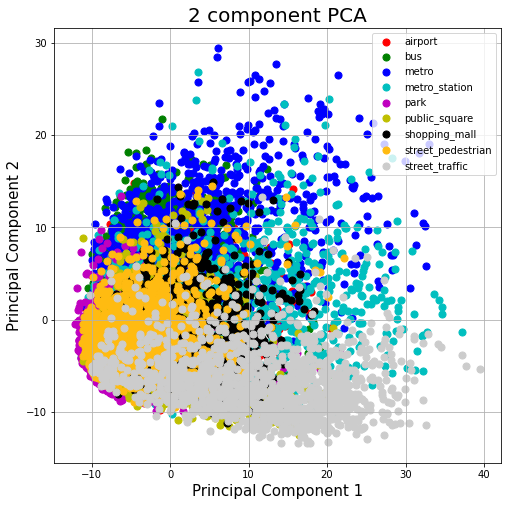

In [85]:
pca(n_components=2, X=X_clmr, y=y_clmr)

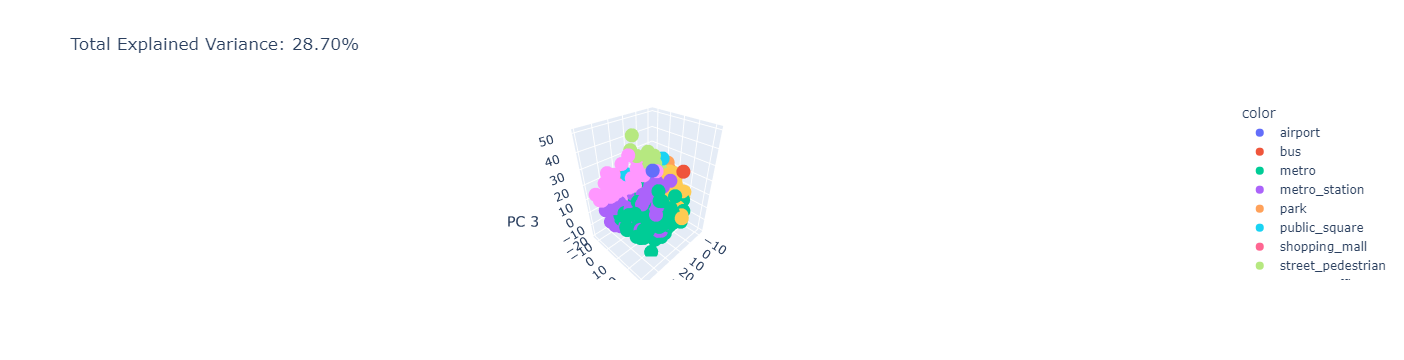

In [86]:
pca(n_components=3, X=X_clmr, y=y_clmr)

## Musicnn

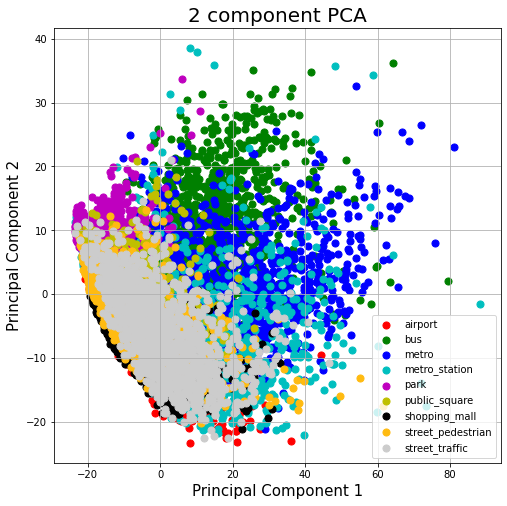

In [87]:
pca(n_components=2, X=X_musicnn, y=y_musicnn)

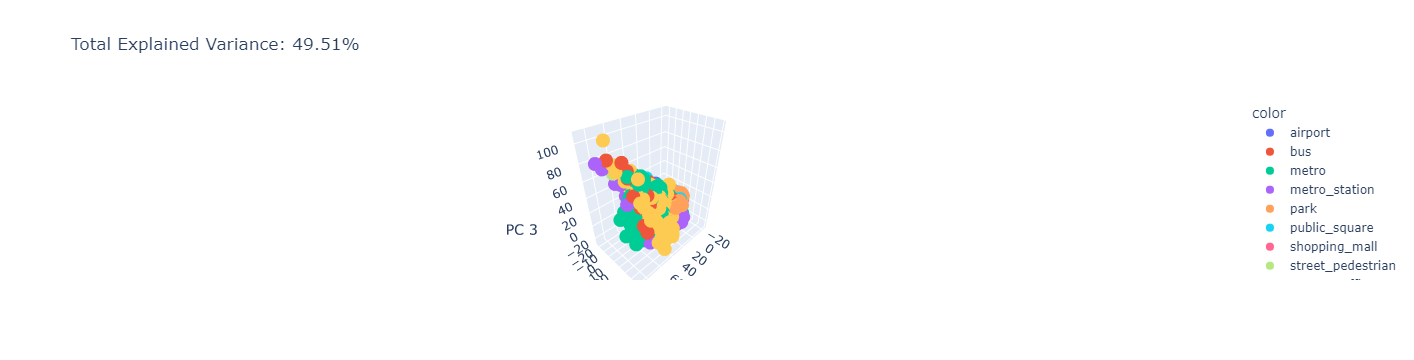

In [88]:
pca(n_components=3, X=X_musicnn, y=y_musicnn)

## Jukebox (0-pad)

In [ ]:
pca(n_components=2, X=X_jukebox_zeropad, y=y_jukebox_zeropad)

In [ ]:
pca(n_components=3, X=X_jukebox_zeropad, y=y_jukebox_zeropad)